In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("cleaned_data.csv")
df

,type,title,director,cast,country,date_added,release_year,duration,listed_in,averageRating,numVotes
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",3.4,578.0
1,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,99 min,Comedies,5.1,7143.0
2,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",6.0,60800.0
3,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,90 min,"Action & Adventure, Thrillers",5.5,17701.0
4,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,95 min,"Action & Adventure, Dramas, International Movies",6.1,22174.0
...,...,...,...,...,...,...,...,...,...,...,...
7183,TV Show,Kikoriki,Kunle Afolayan,Igor Dmitriev,United States,"January 1, 2020",2010,2 Seasons,Kids' TV,4.8,15.0
7184,TV Show,Red vs. Blue,Kunle Afolayan,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1, 2020",2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",6.4,1545.0
7185,TV Show,Maron,Kunle Afolayan,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1, 2020",2016,4 Seasons,TV Comedies,5.2,372.0
7186,Movie,Little Baby Bum: Nursery Rhyme Friends,Kunle Afolayan,David Attenborough,United States,"January 1, 2020",2016,60 min,Movies,6.4,1545.0


In [6]:
import pandas as pd
from collections import Counter

# Drop rows where 'cast' is missing
df = df.dropna(subset=['cast'])

# Split and clean cast names
df['cast_list'] = df['cast'].str.split(',').apply(lambda x: [i.strip() for i in x])

# Count all cast members
all_cast = [actor for sublist in df['cast_list'] for actor in sublist]
top_50_cast = [name for name, count in Counter(all_cast).most_common(50)]

# Create one-hot columns
for actor in top_50_cast:
    df[f'cast_{actor}'] = df['cast_list'].apply(lambda x: int(actor in x))


In [7]:
import pandas as pd
from collections import Counter

# Drop rows where 'director' is missing
df = df.dropna(subset=['director'])

# Split and clean cast names
df['director_list'] = df['director'].str.split(',').apply(lambda x: [i.strip() for i in x])

# Count all cast members
all_directors = [director for sublist in df['director_list'] for director in sublist]
top_50_directors = [name for name, count in Counter(all_cast).most_common(50)]

# Create one-hot columns
for director in top_50_directors:
    df[f'directors_{director}'] = df['director_list'].apply(lambda x: int(director in x))


In [8]:
df.drop(columns=['cast', 'cast_list', 'director','director_list'], inplace=True)


In [9]:
df.head()

,type,title,country,date_added,release_year,duration,listed_in,averageRating,numVotes,cast_David Attenborough,...,directors_Daisuke Ono,directors_Vincent Tong,directors_Erin Fitzgerald,directors_Antonio Banderas,directors_James Franco,directors_Molly Shannon,directors_Jackie Shroff,directors_Luis Tosar,directors_Yashpal Sharma,directors_Mamoru Miyano
0,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",3.4,578.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Movie,#realityhigh,United States,"September 8, 2017",2017,99 min,Comedies,5.1,7143.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Movie,Automata,"Bulgaria, United States, Spain, Canada","September 8, 2017",2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",6.0,60800.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Movie,Good People,"United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,90 min,"Action & Adventure, Thrillers",5.5,17701.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Movie,Kidnapping Mr. Heineken,"Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,95 min,"Action & Adventure, Dramas, International Movies",6.1,22174.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Columns: 109 entries, type to directors_Mamoru Miyano
dtypes: float64(2), int64(101), object(6)
memory usage: 6.0+ MB


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

df["single_country"]=df["country"].str.split(',')
mlb=MultiLabelBinarizer()
encoded_df=mlb.fit_transform(df["single_country"])
encoded_df=pd.DataFrame(encoded_df,columns=mlb.classes_)
df=pd.concat([df.drop(columns=["country"]),encoded_df],axis=1)

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

df["genres"]=df["listed_in"].str.split(',')
mlb=MultiLabelBinarizer()
encoded_df=mlb.fit_transform(df["genres"])
encoded_df=pd.DataFrame(encoded_df,columns=mlb.classes_)
df=pd.concat([df.drop(columns=["listed_in"]),encoded_df],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Columns: 354 entries, type to Thrillers
dtypes: float64(2), int32(245), int64(101), object(6)
memory usage: 12.7+ MB


In [14]:
df.dtypes

type                   object
title                  object
date_added             object
release_year            int64
duration               object
                        ...  
TV Dramas               int32
TV Horror               int32
TV Sci-Fi & Fantasy     int32
TV Shows                int32
Thrillers               int32
Length: 354, dtype: object

In [15]:
X=df.drop(["type","title","date_added","release_year","duration","averageRating","single_country","genres"],axis=1)
y=df["averageRating"]

In [16]:
X

,numVotes,cast_David Attenborough,cast_Shah Rukh Khan,cast_Naseeruddin Shah,cast_Anupam Kher,cast_Boman Irani,cast_Akshay Kumar,cast_Katrina Kaif,cast_Amitabh Bachchan,cast_Yuki Kaji,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,578.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7143.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60800.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17701.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22174.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7184,1545.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7185,372.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7186,1545.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y

0       3.4
1       5.1
2       6.0
3       5.5
4       6.1
       ... 
7183    4.8
7184    6.4
7185    5.2
7186    6.4
7187    6.4
Name: averageRating, Length: 7188, dtype: float64

In [18]:
categorical_features=[x for x in X.columns if X[x].dtype=='O']
print(categorical_features)

[]


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train

,numVotes,cast_David Attenborough,cast_Shah Rukh Khan,cast_Naseeruddin Shah,cast_Anupam Kher,cast_Boman Irani,cast_Akshay Kumar,cast_Katrina Kaif,cast_Amitabh Bachchan,cast_Yuki Kaji,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
7151,1545.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6253,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4666,853.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,18184.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1511,8155.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,82175.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,1545.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5226,8.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,1545.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2_score:",r2_score(y_test,y_pred))

MSE: 0.7164381873494815
MAE: 0.4740953523412497
R2_score: 0.15209913496401162


In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2_score:",r2_score(y_test,y_pred))


MSE: 0.7164381873494815
MAE: 0.4740953523412497
R2_score: 0.15209913496401162


In [25]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))


MSE: 0.6542236323951992
MAE: 0.47986532610547067
R2_score: 0.22572973687081987


In [26]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


In [31]:
feature_names = X.columns.tolist()


cast_columns = [col for col in feature_names if 'cast' in col.lower()]


director_columns = [col for col in feature_names if 'director' in col.lower()]

print("Cast-related features:")
for col in cast_columns:
    print(col, "→ Index:", feature_names.index(col))

print("\nDirector-related features:")
for col in director_columns:
    print(col, "→ Index:", feature_names.index(col))



Cast-related features:
cast_David Attenborough → Index: 1
cast_Shah Rukh Khan → Index: 2
cast_Naseeruddin Shah → Index: 3
cast_Anupam Kher → Index: 4
cast_Boman Irani → Index: 5
cast_Akshay Kumar → Index: 6
cast_Katrina Kaif → Index: 7
cast_Amitabh Bachchan → Index: 8
cast_Yuki Kaji → Index: 9
cast_Paresh Rawal → Index: 10
cast_Om Puri → Index: 11
cast_Takahiro Sakurai → Index: 12
cast_Javier Gutiérrez → Index: 13
cast_Nicolas Cage → Index: 14
cast_John Cleese → Index: 15
cast_Abhay Deol → Index: 16
cast_Saif Ali Khan → Index: 17
cast_Kyeong-yeong Lee → Index: 18
cast_Ashleigh Ball → Index: 19
cast_Andrea Libman → Index: 20
cast_Mohammed Zeeshan Ayyub → Index: 21
cast_Irrfan Khan → Index: 22
cast_Paul Rudd → Index: 23
cast_Gulshan Grover → Index: 24
cast_Kareena Kapoor → Index: 25
cast_Fred Tatasciore → Index: 26
cast_Nassar → Index: 27
cast_Arjun Mathur → Index: 28
cast_Madhavan → Index: 29
cast_Brijendra Kala → Index: 30
cast_Chino Darín → Index: 31
cast_Guy Pearce → Index: 32
cast_A

In [32]:
cast_indices = list(range(1, 25))  # if cast_ goes from index 1 to 24
director_indices = list(range(51, 101))  # if directors_ goes from index 97 to 99


In [ ]:
import numpy as np
import pandas as pd

mean_shap_cast = np.abs(shap_values[:, cast_indices]).mean(axis=0)
cast_feature_names = [feature_names[i] for i in cast_indices]

mean_shap_director = np.abs(shap_values[:, director_indices]).mean(axis=0)
director_feature_names = [feature_names[i] for i in director_indices]

cast_df = pd.DataFrame({'Name': cast_feature_names, 'Mean_SHAP_Impact': mean_shap_cast, 'Type': 'Cast'})
director_df = pd.DataFrame({'Name': director_feature_names, 'Mean_SHAP_Impact': mean_shap_director, 'Type': 'Director'})

impact_df = pd.concat([cast_df, director_df]).sort_values(by='Mean_SHAP_Impact', ascending=False)


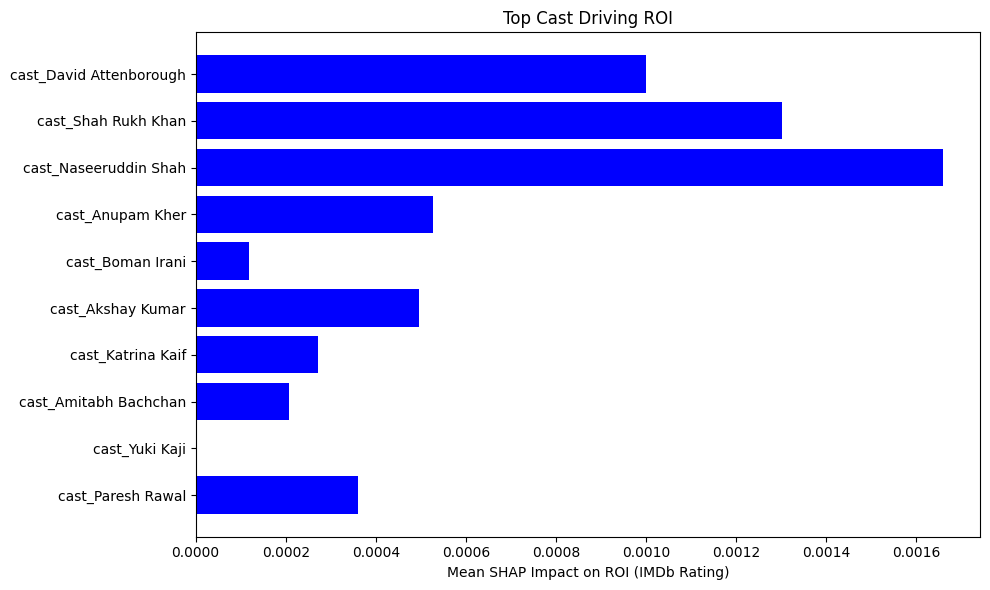

In [44]:
top_cast = cast_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cast["Name"], top_cast["Mean_SHAP_Impact"], color="blue")
plt.xlabel("Mean SHAP Impact on ROI (IMDb Rating)")
plt.title("Top Cast Driving ROI")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



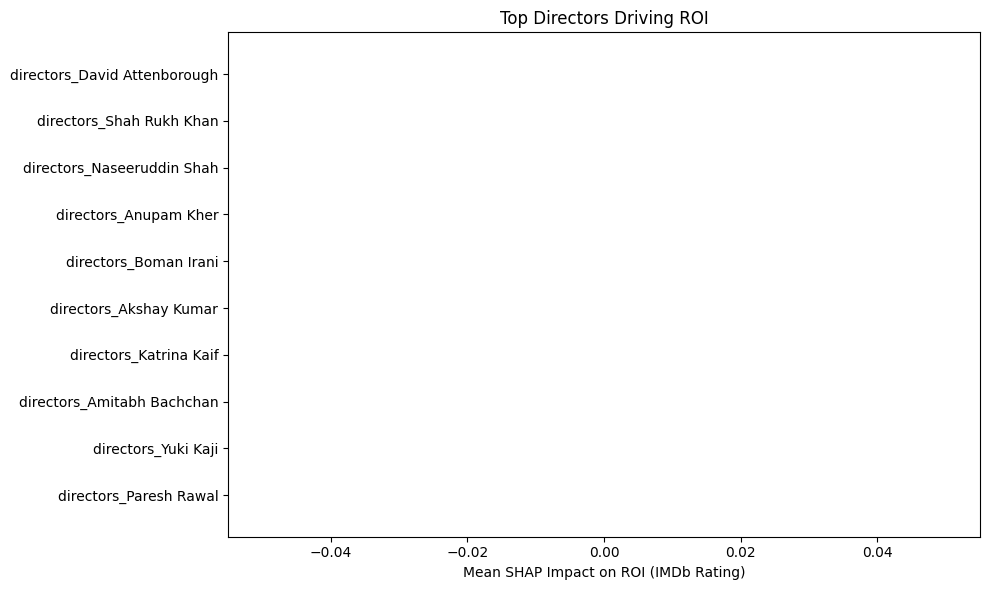

In [43]:
import matplotlib.pyplot as plt

top_directors = director_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_directors["Name"], top_directors["Mean_SHAP_Impact"], color="green")
plt.xlabel("Mean SHAP Impact on ROI (IMDb Rating)")
plt.title("Top Directors Driving ROI")
plt.gca().invert_yaxis()  # highest at the top
plt.tight_layout()
plt.show()
